## Intelligence artificielle et raisonnement TP1


travail réalisé par: Med Aziz Bellaj, Louay Badri , Sandra Mourali et Salma Ghabri. 

Considérons le jeu du taquin suivant où il s’agit de passer de l’état initial (à gauche) à l’état final (à droite)


En utilisant le langage Python, on vous demande de :

    1. Coder de manière générique les états, les actions, la fonction de transition d’états, l’état initial et les états finaux d’un problème de recherche dans un graphe d’états.


In [12]:
GOAL_STATE = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
DIRECTIONS = {
    "UP": (-1, 0),
    "RIGHT": (0, 1),
    "DOWN": (1, 0),
    "LEFT": (0, -1),
}


class Taquin:
    def __init__(self, initial_state, goal_state):
        self.state = initial_state
        self.goal = goal_state

    def __str__(self):
        return "\n".join([" ".join(map(str, row)) for row in self.state])

    def get_empty_tile_position(self):
        empty_tile_row, empty_tile_col = next(
            (row, col)
            for row, row_data in enumerate(self.state)
            for col, value in enumerate(row_data)
            if value == 0
        )
        return (empty_tile_row, empty_tile_col)

    def move(self, direction):
        # Recherche des coordonnées de la tuile vide (représentée par 0)
        empty_tile_row, empty_tile_col = self.get_empty_tile_position()

        # ? Ce direction nous permet d'éviter plusieurs blocs de if et elif
        # Déplacement de la tuile vide dans la direction spécifiée
        if direction in DIRECTIONS.keys():
            i, j = DIRECTIONS[direction]
            new_empty_tile_row, new_empty_tile_col = (
                empty_tile_row + i,
                empty_tile_col + j,
            )

            if 0 <= new_empty_tile_row < len(
                self.state
            ) and 0 <= new_empty_tile_col < len(self.state[0]):
                self.state[empty_tile_row][empty_tile_col] = self.state[
                    new_empty_tile_row
                ][new_empty_tile_col]
                self.state[new_empty_tile_row][new_empty_tile_col] = 0
        #     else:
        #         print("Mouvement invalide")
        # else:
        #     print("Direction invalide")

        return self.state

    def is_goal(self):
        return self.state == self.goal

In [13]:
# Exemple d'utilisation
initial_state = [[7, 2, 4], [5, 0, 6], [8, 3, 1]]  # 0 représente la tuile vide

# initialiser le taquin
taquin = Taquin(initial_state, GOAL_STATE)
print(f"État initial:\n{taquin}\n")


# Déplacez la tuile dans des directions différentes
taquin.move("UP")
print(f"UP:\n{taquin}\n")

taquin.move("DOWN")
print(f"DOWN:\n{taquin}\n")

taquin.move("DOWN")
print(f"DOWN:\n{taquin}\n")

taquin.move("LEFT")
print(f"LEFT:\n{taquin}\n")

taquin.move("RIGHT")
print(f"RIGHT:\n{taquin}\n")

taquin.move("RIGHT")
print(f"RIGHT:\n{taquin}\n")

taquin.move("RIGHT")
print(f"RIGHT:\n{taquin}\n")

État initial:
7 2 4
5 0 6
8 3 1

UP:
7 0 4
5 2 6
8 3 1

DOWN:
7 2 4
5 0 6
8 3 1

DOWN:
7 2 4
5 3 6
8 0 1

LEFT:
7 2 4
5 3 6
0 8 1

RIGHT:
7 2 4
5 3 6
8 0 1

RIGHT:
7 2 4
5 3 6
8 1 0

RIGHT:
7 2 4
5 3 6
8 1 0



#### Recherche par profondeur


In [14]:
graph = {"5": ["3", "7"], "3": ["2", "4"], "7": ["8"], "2": [], "4": ["8"], "8": []}

visited = set()  # Set to keep track of visited nodes of graph.


def dfs(visited, graph, node):
    # function for dfs
    print(node)
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(visited, graph, neighbor)


dfs(visited, graph, "5")

5
3
2
4
8
7


#### Recherche par profondeur limitée


In [15]:
graph = {"5": ["3", "7"], "3": ["2", "4"], "7": ["8"], "2": [], "4": ["8"], "8": []}

visited = set()  # Set to keep track of visited nodes of graph.
depth_limit = 1


def depth_limited_search(visited, graph, node, depth_limit):
    # function for dfs
    if node in visited:
        return
    if depth_limit >= 0:
        print(node)
        visited.add(node)
        for neighbor in graph[node]:
            depth_limited_search(visited, graph, neighbor, depth_limit - 1)
    return visited, graph, node, depth_limit

depth_limited_search(visited, graph, "5", depth_limit)

5
3
7


({'3', '5', '7'},
 {'5': ['3', '7'], '3': ['2', '4'], '7': ['8'], '2': [], '4': ['8'], '8': []},
 '5',
 1)

# Possible optimization:


The way we coded the dfs algorithm is wasteful in terms of memory. We are pushing nodes to be treated on the stack regardless whether or not we have seen them. We can reduce the stack space by only pushing values that have not been visited before.


In [16]:
graph = {"5": ["3", "7"], "3": ["2", "4"], "7": ["8"], "2": [], "4": ["8"], "8": []}

visited = set()  # Set to keep track of visited nodes of graph.
depth_limit = 1


def depth_limited_search(visited, graph, node, depth_limit):
    # function for dfs
    if depth_limit >= 0:
        print(node)
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                depth_limited_search(visited, graph, neighbor, depth_limit - 1)
    return visited, graph, node, depth_limit

depth_limited_search(visited, graph, "5", depth_limit)

5
3
7


({'3', '5', '7'},
 {'5': ['3', '7'], '3': ['2', '4'], '7': ['8'], '2': [], '4': ['8'], '8': []},
 '5',
 1)

##### Exemple jeu de taquin


In [17]:
class TaquinNode(Taquin):
    def __init__(self, state, goal_state, parent=None):
        self.state = state
        self.goal = goal_state
        self.parent = parent

    def get_next_states(self):
        # Retourne les états enfants possibles à partir de l'état actuel du taquin
        next_state = []
        empty_row, empty_col = self.get_empty_tile_position()

        for direction in DIRECTIONS.keys():
            row_change, col_change = DIRECTIONS[direction]
            new_row, new_col = empty_row + row_change, empty_col + col_change

            if 0 <= new_row < len(self.state) and 0 <= new_col < len(self.state[0]):
                new_state = [list(row) for row in self.state]  # Copie de l'état actuel
                new_state[empty_row][empty_col], new_state[new_row][new_col] = (
                    new_state[new_row][new_col],
                    new_state[empty_row][empty_col],
                )
                next_state.append(TaquinNode(new_state, self.goal, parent=self))

        return next_state

This is the function that will allow us to the path to our solution.


In [18]:
def solution(node: TaquinNode):
    path = []
    while node:
        path.append(node)
        node = node.parent
    return list(reversed(path))

In [47]:
def depth_limited_search_taquin(node, depth_limit, visited_nodes, iteration):
    if isinstance(node, TaquinNode) and node.is_goal():
        return (solution(node), visited_nodes, iteration)
    elif depth_limit == 0:
        return ("Depth_Limit_Exceeded", visited_nodes, iteration)
    else:
        cutoff_occurred = False
        for state in node.get_next_states():
            result = depth_limited_search_taquin(
                state, depth_limit - 1, visited_nodes + 1, iteration + 1
            )
            if result[0] == "Depth_Limit_Exceeded":
                cutoff_occurred = True
            elif result is not None:
                return result
        return (
            ("Depth_Limit_Exceeded", visited_nodes, iteration)
            if cutoff_occurred
            else None
        )

In [19]:
initial_state = [[1, 2, 3], [4, 5, 6], [0, 7, 8]]
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
root = TaquinNode(initial_state, goal_state)
result = depth_limited_search_taquin(root, 5, 1, 0)

if result[0] == "Depth_Limit_Exceeded":
    print("La profondeur limite a été atteinte sans trouver la solution.")
else:
    print(
        f"On a atteint une solution après {result[1]} noeuds visités et {result[2]} itérations"
    )
    for state in result[0]:
        print(f"{state}\n")

On a atteint une solution après 5 noeuds visités et 4 itérations
1 2 3
4 5 6
0 7 8

1 2 3
0 5 6
4 7 8

1 2 3
4 5 6
0 7 8

1 2 3
4 5 6
7 0 8

1 2 3
4 5 6
7 8 0



#### Recherche par profondeur itérative


In [20]:
graph = {"5": ["3", "7"], "3": ["2", "4"], "7": ["8"], "2": [], "4": ["8"], "8": []}

visited = set()  # Set to keep track of visited nodes of graph.
depth_limit = 3


def iterative_deepening_search(visited, graph, node, depth_limit):
    # function for iterative_deepening_search
    limit = 0
    while limit <= depth_limit:
        depth_limited_search(visited, graph, node, limit)
        limit += 1
        visited.clear()


iterative_deepening_search(visited, graph, "5", depth_limit)

5
5
3
7
5
3
2
4
7
8
5
3
2
4
8
7


##### Exemple jeu de taquin


In [48]:
def iterative_deepening_search_taquin(root, depth_limit):
    limit = 0
    while limit <= depth_limit:
        result = depth_limited_search_taquin(root, limit, 1, 0)

        if result[0] != "Depth_Limit_Exceeded":
            return result
        limit += 1


initial_state = [[1, 2, 3], [4, 5, 0], [6, 7, 8]]
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
root = TaquinNode(initial_state, goal_state)
result = iterative_deepening_search_taquin(root, depth_limit=20)
# print(result)
if result is None:
    print("La profondeur limite a été atteinte sans trouver la solution.")

else:
    print(
        f"On a atteint une solution après {result[1]} noeuds visités et {result[2]} itérations"
    )
    for state in result[0]:
        print(f"{state}\n")

On a atteint une solution après 14 noeuds visités et 13 itérations
1 2 3
4 5 0
6 7 8

1 2 3
4 5 8
6 7 0

1 2 3
4 5 8
6 0 7

1 2 3
4 5 8
0 6 7

1 2 3
0 5 8
4 6 7

1 2 3
5 0 8
4 6 7

1 2 3
5 6 8
4 0 7

1 2 3
5 6 8
4 7 0

1 2 3
5 6 0
4 7 8

1 2 3
5 0 6
4 7 8

1 2 3
0 5 6
4 7 8

1 2 3
4 5 6
0 7 8

1 2 3
4 5 6
7 0 8

1 2 3
4 5 6
7 8 0



#### Recherche A\*


In [22]:
graph = {
    # now we need a list as the value to store g-score and h-score
    # list first value is the g-score, second value is the h-score,i.e., heuristic
    "5": {"3": [2, 2], "7": [3, 2]},
    "3": {"2": [3, 5], "4": [1, 1]},
    "7": {"8": [2, 0]},
    "2": {},
    "4": {"8": [1, 0]},
    "8": {},
}

In [23]:
graph = {
    # now we need a list as the value to store g-score and h-score
    # list first value is the g-score, second value is the h-score,i.e., heuristic
    "5": {"3": [2, 2], "7": [3, 2]},
    "3": {"2": [3, 5], "4": [1, 1]},
    "7": {"8": [2, 0]},
    "2": {},
    "4": {"8": [1, 0]},
    "8": {},
}

heuristic = {"5": 2, "3": 2, "7": 2, "2": 5, "4": 1, "8": 0}

f = {
    "5": 0,
}


def astar(start, goal):
    open_nodes = {start}
    closed = set()
    while open_nodes:
        current = min(open_nodes, key=lambda node: f[node] + heuristic[node])
        print(f"current chosen is {current}")
        if current is goal:
            print(f"goal reached {current}")
            return current

        open_nodes.remove(current)
        closed.add(current)

        for neighbor, params in graph[current].items():
            if neighbor in closed:
                continue
            # the cost of the neighbor is the cost of the current node plus the cost to get to the neighbor
            new_cost = f[current] + params[0]
            if neighbor not in open_nodes or f[neighbor] > new_cost:
                f[neighbor] = new_cost
                open_nodes.add(neighbor)
                # print(f'{current} goes to {neighbor} with cost {new_cost}')

    return None


result = astar("5", "8")

current chosen is 5
current chosen is 3
current chosen is 4
current chosen is 8
goal reached 8


##### Exemple jeu de taquin


We will use the manhattan heuristic in our A\* algorithm


In [24]:
# A star for taquin game
# here the heuristiq is the sum of all the mantahten distance of each tile to its goal position
def heuristic_manhatten_n(current_state, n):
    manhatten_distance = 0
    for i in range(len(current_state)):
        for j in range(len(current_state[0])):
            if current_state[i][j] == 0:
                continue
            if i + n * j + 1 != current_state[i][j]:
                vert_error = abs((current_state[i][j] - 1) % n - j)
                horiz_error = abs((current_state[i][j] - 1) // n - i)
                manhatten_distance += vert_error + horiz_error
    return manhatten_distance

In [25]:
def astar_taquin(start: TaquinNode, goal: TaquinNode, heuristic_function, n: int = 3):
    f = {str(start): 0}
    node_visited_number = 1
    iterations = 0
    open_nodes = [start]

    closed = []
    while open_nodes:
        current = min(
            open_nodes, key=lambda node: f[str(node)] + heuristic_function(node, n)
        )
        taquin_current = TaquinNode(current, goal)

        print("current")
        print(current)
        print()
        if current == goal:
            print(f"goal {current} achieved with a cost of {f[str(current)]}")
            print(
                f"goal achieved after visiting {node_visited_number} nodes and {iterations} iterations"
            )
            # print()
            print()
            return current

        open_nodes.remove(current)
        closed.append(current)
        # print(f"closed {closed}")

        neighbors = [e.state for e in taquin_current.get_next_states()]
        for neighbor in neighbors:
            iterations += 1
            if str(neighbor) in closed:
                continue
            # the cost of the neighbor is the cost of the current node plus the cost to get to the neighbor
            new_cost = (
                f[str(current)] + 1
            )  # the cost to get to the neighbor is always 1
            if neighbor not in open_nodes or f[str(neighbor)] > new_cost:
                node_visited_number += 1
                f[str(neighbor)] = new_cost
                open_nodes.append(neighbor)
        # print(f[str(current)])
        # print(len(open_nodes))

    return None

    3. Instancier avec le problème du Taquin en utilisant 2 heuristiques admissibles vues en cours 


In [26]:
# A star for taquin game
# here the heuristiq is the sum of all the mantahten distance of each tile to its goal position
def heuristic_n(current_state, n):
    heuristic = 0
    for i in range(len(current_state)):
        for j in range(len(current_state[0])):
            if current_state[i][j] == 0:
                continue
            if i + n * j + 1 != current_state[i][j]:
                heuristic += 1
    return heuristic

In [27]:
# initial_state = [[1, 2, 3], [4, 5, 6], [0, 7, 8]]

initial_state = [[1, 2, 3], [4, 5, 0], [6, 7, 8]]
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
root = TaquinNode(initial_state, goal_state)
result = astar_taquin(initial_state, goal_state, heuristic_manhatten_n, 3)

current
[[1, 2, 3], [4, 5, 0], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 8], [6, 7, 0]]

current
[[1, 2, 0], [4, 5, 3], [6, 7, 8]]

current
[[1, 2, 3], [4, 0, 5], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 0], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 8], [6, 0, 7]]

current
[[1, 2, 3], [4, 5, 8], [0, 6, 7]]

current
[[1, 2, 3], [4, 5, 8], [6, 7, 0]]

current
[[1, 2, 3], [0, 5, 8], [4, 6, 7]]

current
[[1, 2, 3], [4, 5, 8], [0, 6, 7]]

current
[[1, 0, 2], [4, 5, 3], [6, 7, 8]]

current
[[1, 0, 3], [4, 2, 5], [6, 7, 8]]

current
[[1, 2, 3], [4, 7, 5], [6, 0, 8]]

current
[[1, 2, 3], [4, 7, 5], [0, 6, 8]]

current
[[1, 2, 3], [0, 4, 5], [6, 7, 8]]

current
[[1, 2, 0], [4, 5, 3], [6, 7, 8]]

current
[[1, 2, 3], [4, 0, 5], [6, 7, 8]]

current
[[1, 2, 3], [4, 0, 8], [6, 5, 7]]

current
[[1, 2, 3], [4, 5, 8], [6, 0, 7]]

current
[[1, 2, 3], [4, 5, 8], [0, 6, 7]]

current
[[1, 2, 3], [4, 5, 0], [6, 7, 8]]

current
[[0, 2, 3], [1, 5, 8], [4, 6, 7]]

current
[[1, 2, 3], [5, 0, 8], [4, 6, 7]]

current
[[1

In [28]:
result = astar_taquin(initial_state, goal_state, heuristic_n, 3)

current
[[1, 2, 3], [4, 5, 0], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 8], [6, 7, 0]]

current
[[1, 2, 0], [4, 5, 3], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 8], [6, 0, 7]]

current
[[1, 2, 3], [4, 5, 8], [0, 6, 7]]

current
[[1, 2, 3], [4, 0, 5], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 0], [6, 7, 8]]

current
[[1, 0, 2], [4, 5, 3], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 8], [6, 7, 0]]

current
[[1, 2, 3], [0, 5, 8], [4, 6, 7]]

current
[[1, 2, 3], [4, 0, 8], [6, 5, 7]]

current
[[1, 2, 3], [4, 5, 8], [6, 0, 7]]

current
[[1, 0, 3], [4, 2, 5], [6, 7, 8]]

current
[[1, 2, 3], [4, 7, 5], [6, 0, 8]]

current
[[1, 2, 3], [0, 4, 5], [6, 7, 8]]

current
[[1, 2, 0], [4, 5, 3], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 8], [0, 6, 7]]

current
[[1, 2, 3], [4, 7, 5], [0, 6, 8]]

current
[[1, 2, 3], [4, 0, 5], [6, 7, 8]]

current
[[1, 5, 2], [4, 0, 3], [6, 7, 8]]

current
[[0, 1, 2], [4, 5, 3], [6, 7, 8]]

current
[[1, 2, 3], [4, 5, 0], [6, 7, 8]]

current
[[0, 2, 3], [1, 5, 8], [4, 6, 7]]

current
[[1


[[1, 3, 8], [4, 5, 2], [0, 6, 7]]

current
[[2, 7, 3], [1, 5, 8], [4, 6, 0]]

current
[[1, 8, 2], [4, 5, 3], [0, 6, 7]]

current
[[1, 2, 3], [4, 8, 0], [6, 5, 7]]

current
[[2, 5, 3], [1, 8, 0], [4, 6, 7]]

current
[[2, 5, 3], [1, 6, 8], [4, 0, 7]]

current
[[1, 2, 3], [4, 0, 8], [6, 5, 7]]

current
[[1, 2, 3], [7, 6, 5], [4, 0, 8]]

current
[[1, 2, 3], [7, 0, 5], [4, 6, 8]]

current
[[1, 2, 3], [7, 0, 8], [4, 5, 6]]

current
[[0, 1, 3], [4, 2, 5], [6, 7, 8]]

current
[[0, 2, 3], [1, 4, 5], [6, 7, 8]]

current
[[1, 2, 3], [5, 8, 7], [4, 0, 6]]

current
[[1, 2, 3], [5, 6, 0], [4, 7, 8]]

current
[[0, 5, 2], [1, 4, 3], [6, 7, 8]]

current
[[4, 1, 2], [5, 0, 3], [6, 7, 8]]

current
[[2, 5, 3], [1, 0, 8], [4, 6, 7]]

current
[[0, 1, 3], [5, 2, 8], [4, 6, 7]]

current
[[0, 1, 2], [4, 8, 3], [6, 5, 7]]

current
[[1, 3, 8], [4, 2, 0], [6, 5, 7]]

current
[[0, 1, 5], [4, 3, 2], [6, 7, 8]]

current
[[4, 1, 2], [6, 0, 3], [7, 5, 8]]

current
[[1, 2, 3], [6, 8, 0], [5, 4, 7]]

current
[[1, 2, 3]

    4. Comparer les algorithmes à l’aide d’un graphique :  nombre de nœuds traités, taille maximale de la liste des nœuds candidats (ouverts)


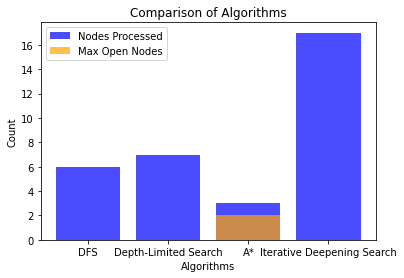

In [29]:
import matplotlib.pyplot as plt

def dfs_info(visited, graph, node):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs_info(visited, graph, neighbor)


def depth_limited_search_info(visited, graph, node, depth_limit, node_count):
    if node in visited:
        return
    if depth_limit >= 0:
        node_count[0] += 1
        visited.add(node)
        for neighbor in graph[node]:
            depth_limited_search_info(visited, graph, neighbor, depth_limit - 1, node_count)

def astar_info(start, goal, graph, heuristic):
    open_nodes = {start}
    closed = set()
    node_count = 0
    max_open_nodes = 0

    while open_nodes:
        current = min(open_nodes, key=lambda x: heuristic[x])
        open_nodes.remove(current)
        closed.add(current)

        if current == goal:
            return node_count, max_open_nodes

        for neighbor in graph[current]:
            if neighbor not in closed:
                open_nodes.add(neighbor)
                node_count += 1
                max_open_nodes = max(max_open_nodes, len(open_nodes))

    return node_count, max_open_nodes

def iterative_deepening_search_info(visited, graph, node, depth_limit, node_count):
    limit = 0
    while limit <= depth_limit:
        depth_limited_search_info(visited, graph, node, limit, node_count)
        limit += 1
        visited.clear()


algorithms = ["DFS", "Depth-Limited Search", "A*", "Iterative Deepening Search"]
nodes_processed = []
max_open_nodes_list = []

# DFS
visited_dfs = set()
dfs_info(visited_dfs, graph, "5")
nodes_processed.append(len(visited_dfs))
max_open_nodes_list.append(0)  


visited_dls = set()
node_count_dls = [1]  
depth_limited_search_info(visited_dls, graph, "5", depth_limit, node_count_dls)
nodes_processed.append(node_count_dls[0])
max_open_nodes_list.append(0)  

# A*
node_count_astar, max_open_nodes_astar = astar_info("5", "8", graph, heuristic)
nodes_processed.append(node_count_astar)
max_open_nodes_list.append(max_open_nodes_astar)

visited_ids = set()
node_count_ids = [1] 
iterative_deepening_search_info(visited_ids, graph, "5", depth_limit, node_count_ids)
nodes_processed.append(node_count_ids[0])
max_open_nodes_list.append(0)  

plt.bar(algorithms, nodes_processed, color='blue', alpha=0.7, label='Nodes Processed')
plt.bar(algorithms, max_open_nodes_list, color='orange', alpha=0.7, label='Max Open Nodes')
plt.xlabel('Algorithms')
plt.ylabel('Count')
plt.title('Comparison of Algorithms')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
def astar_taquin(node: TaquinNode, goal: list, heuristic_function, n: int = 3):
    f = {tuple(map(tuple, node.state)): 0}  
    node_visited_number = 1
    iterations = 0
    open_nodes = [node]

    closed = []
    while open_nodes:
        current = min(
            open_nodes, key=lambda x: f[tuple(map(tuple, x.state))] + heuristic_function(x.state, n)
        )
        taquin_current = TaquinNode(current.state, goal)

        if current.state == goal:
            print(
                f"goal {current.state} achieved with a cost of {f[tuple(map(tuple, current.state))]}"
            )
            print(
                f"goal achieved after visiting {node_visited_number} nodes and {iterations} iterations"
            )
            return current.state

        open_nodes.remove(current)
        closed.append(current.state)

        neighbors = [e.state for e in taquin_current.get_next_states()]
        for neighbor in neighbors:
            iterations += 1
            if tuple(map(tuple, neighbor)) in closed:
                continue
            new_cost = f[tuple(map(tuple, current.state))] + 1  
            if neighbor not in open_nodes or f[tuple(map(tuple, neighbor))] > new_cost:
                node_visited_number += 1
                f[tuple(map(tuple, neighbor))] = new_cost  
                open_nodes.append(TaquinNode(neighbor, goal, parent=current))

    return None



def run_multiple_instances(algorithm, instances, depth_limit=None):
    total_nodes_visited = 0
    max_open_list_size = 0

    for initial_state in instances:
        taquin = TaquinNode(initial_state, GOAL_STATE)

        if algorithm == "dfs":
            result = depth_limited_search_taquin(taquin, depth_limit, 1, 0)
        elif algorithm == "ids":
            result = iterative_deepening_search_taquin(taquin, depth_limit)
        elif algorithm == "astar":
            result = astar_taquin(taquin, GOAL_STATE, heuristic_manhatten_n, 3)
        else:
            raise ValueError("Invalid algorithm")

        if result and result[0] != "Depth_Limit_Exceeded":
            total_nodes_visited += result[1]
            max_open_list_size = max(max_open_list_size, result[1])

    return total_nodes_visited, max_open_list_size


instances_count = 10
instances = [
    [[7, 2, 4], [5, 0, 6], [8, 3, 1]],

]

# Compare DFS, IDS, and A* algorithms
algorithms = ["dfs", "ids", "astar"]
depth_limit = 5  

results = {}

for algorithm in algorithms:
    total_visited, max_open_list = run_multiple_instances(
        algorithm, instances, depth_limit
    )
    results[algorithm] = {"algorithm": algorithm} 

    if "total_visited" in locals():  
        results[algorithm]["total_visited"] = total_visited

    if "max_open_list" in locals():  
        results[algorithm]["max_open_list"] = max_open_list

labels = results.keys()
total_visited_values = [results[alg]["total_visited"] for alg in labels]
max_open_list_values = [results[alg]["max_open_list"] for alg in labels]

fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Algorithm")
ax1.set_ylabel("Total Nodes Visited", color=color)
ax1.bar(labels, total_visited_values, color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Max Open List Size", color=color)
ax2.plot(labels, max_open_list_values, color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.show()


# time performance comparaison 

In [43]:
# changing the output of the search algorithms 
import time

def astar_taquin(start: TaquinNode, goal: TaquinNode, heuristic_function, n: int = 3):
    f = {str(start): 0}
    node_visited_number = 1
    iterations = 0
    open_nodes = [start]
    start_time = time.time()

    closed = []
    while open_nodes:
        current = min(open_nodes, key=lambda node: f[str(node)] + heuristic_function(node, n))
        taquin_current = TaquinNode(current, goal)

        if current == goal:
            end_time = time.time()
            print(f"Goal {current} achieved with a cost of {f[str(current)]}")
            print(f"Goal achieved after visiting {node_visited_number} nodes and {iterations} iterations")
            execution_time = end_time - start_time
            return current, execution_time, node_visited_number

        open_nodes.remove(current)
        closed.append(current)

        neighbors = [e.state for e in taquin_current.get_next_states()]
        for neighbor in neighbors:
            iterations += 1
            if str(neighbor) in closed:
                continue

            new_cost = f[str(current)] + 1
            if neighbor not in open_nodes or f[str(neighbor)] > new_cost:
                node_visited_number += 1
                f[str(neighbor)] = new_cost
                open_nodes.append(neighbor)

    return None, None, None




def depth_limited_search_taquin(node, depth_limit, visited_nodes=0):
    if depth_limit == 0:
        return "Depth_Limit_Exceeded", visited_nodes + 1
    if node.is_goal():
        
        return solution(node), visited_nodes + 1
    
    else:
        cutoff_occurred = False
        for state in node.get_next_states():
            result, nodes_visited = depth_limited_search_taquin(state, depth_limit - 1, visited_nodes + 1)
            visited_nodes = nodes_visited
            if result == "Depth_Limit_Exceeded":
                cutoff_occurred = True
            elif result is not None:
                return result, visited_nodes

        return "Depth_Limit_Exceeded", visited_nodes if cutoff_occurred else None
    

def iterative_deepening_search_taquin(root, depth_limit):
    limit = 0
    visited_nodes = 0
    start_time = time.time()

    while limit <= depth_limit:
        result, nodes_visited = depth_limited_search_taquin(root, limit)
        visited_nodes += nodes_visited
        
        if result != "Depth_Limit_Exceeded":
            end_time = time.time()
            execution_time = end_time - start_time
            return result, execution_time, visited_nodes
        
        limit += 1

    return None, None, None

In [36]:
result_state, execution_time, visited_nodes = astar_taquin(initial_state, goal_state, heuristic_manhatten_n,3)

if result_state is None:
    print("A* Search: La solution n'a pas été trouvée.")
else:
    print("A* Search: Solution trouvée!")
    # Process the result state if needed
    print(f"Time taken: {execution_time} seconds")
    print(f"Visited nodes: {visited_nodes}")

Goal [[1, 2, 3], [4, 5, 6], [7, 8, 0]] achieved with a cost of 13
Goal achieved after visiting 376 nodes and 565 iterations
A* Search: Solution trouvée!
Time taken: 0.6650464534759521 seconds
Visited nodes: 376


In [44]:
result, execution_time, visited_nodes = iterative_deepening_search_taquin(root, depth_limit=20)

if result is None:
    print("La profondeur limite a été atteinte sans trouver la solution.")
else:
    print("On a atteint une solution:")
    for state in result:
        print(f"{state}\n")
    print(f"Time taken: {execution_time} seconds")
    print(f"Visited nodes: {visited_nodes}")

On a atteint une solution:
1 2 3
4 5 0
6 7 8

1 2 3
4 5 8
6 7 0

1 2 3
4 5 8
6 0 7

1 2 3
4 5 8
0 6 7

1 2 3
0 5 8
4 6 7

1 2 3
5 0 8
4 6 7

1 2 3
5 6 8
4 0 7

1 2 3
5 6 8
4 7 0

1 2 3
5 6 0
4 7 8

1 2 3
5 0 6
4 7 8

1 2 3
0 5 6
4 7 8

1 2 3
4 5 6
0 7 8

1 2 3
4 5 6
7 0 8

1 2 3
4 5 6
7 8 0

Time taken: 33.156591176986694 seconds
Visited nodes: 5615231


In [40]:
start_time = time.time()
result, nodes_visited = depth_limited_search_taquin(root, depth_limit=20)
end_time=time.time()
if result == "Depth_Limit_Exceeded":
    print("Depth limit reached without finding a solution.")
else:
    print("Solution found!")
    print(f"Time taken: {end_time-start_time} seconds")
    
    print(f"Number of nodes visited: {nodes_visited}")

Solution found!
Time taken: 15.755254983901978 seconds
Number of nodes visited: 2576530


now we will generate multiple initial states to calculate the average of visited nodes and execution time for each of the above algorithms.

In [41]:
import random

random.seed(42)
def generate_multiple_lists(m, n):
    generated_lists = []
    for _ in range(m):
        unique_numbers = list(range(n*n))
        random.shuffle(unique_numbers)

        new_list = [unique_numbers[i*n:(i+1)*n] for i in range(n)]
        generated_lists.append(new_list)
    return generated_lists

m = 3  
n = 3 
initial_states = generate_multiple_lists(m, n)

for lst in initial_states:
    print(lst)


[[3, 6, 7], [4, 8, 2], [5, 0, 1]]
[[7, 2, 5], [6, 0, 3], [4, 1, 8]]
[[2, 5, 7], [8, 6, 1], [4, 0, 3]]


In [45]:
def calculate_average(results):
    total_time = 0.0
    total_visited_nodes = 0
    n = len(results)

    for result in results:
        time_taken, visited_nodes = result
        total_time += time_taken
        total_visited_nodes += visited_nodes

    average_time = total_time / n if n > 0 else 0.0
    average_visited_nodes = total_visited_nodes / n if n > 0 else 0

    return average_time, average_visited_nodes

#### depth limited search

In [ ]:
results = []
for state in initial_states:
    print(state)
    root = TaquinNode(state, goal_state)
    start_time = time.time()
    result, visited_nodes = depth_limited_search_taquin(root, depth_limit=20)
    end_time=time.time()
    if result is None:
        print("La profondeur limite a été atteinte sans trouver la solution.")
    else:
        time_taken=end_time-start_time
        print(result)
        results.append((time_taken, visited_nodes))

In [ ]:
average_time_dls, average_visited_nodes_dls = calculate_average(results)
print(average_time_dls)
print(average_visited_nodes_dls)

#### iterative deepening search 

In [ ]:
results = []
for state in initial_states:
    print(state)
    root = TaquinNode(state, goal_state)
    result, execution_time, visited_nodes = iterative_deepening_search_taquin(root, depth_limit=20)
    
    if result is None:
        print("La profondeur limite a été atteinte sans trouver la solution.")
    else:
        
        results.append((execution_time, visited_nodes))

In [ ]:
average_time_ids, average_visited_nodes_ids = calculate_average(results)
print(average_time_ids)
print(average_visited_nodes_ids)

#### A* manhattan heuristic

In [ ]:
results = []
for state in initial_states:
    print(state)
    root = TaquinNode(state, goal_state)
    result_state, execution_time, visited_nodes = astar_taquin(state, goal_state, heuristic_manhatten_n,3)
    
    if result is None:
        print("no solution found")
    else:
        results.append((execution_time, visited_nodes))



In [ ]:
average_time_a_star_man, average_visited_nodes_a_star_man = calculate_average(results)
print(average_time_a_star_man)
print(average_visited_nodes_a_star_man)

#### A* misplaced tiles heuristic

In [ ]:
results = []
for state in initial_states:
    print(state)
    root = TaquinNode(state, goal_state)
    result_state, execution_time, visited_nodes = astar_taquin(initial_state, goal_state, heuristic_n,3)
    
    if result is None:
        print("no solution found")
    else:
        results.append((execution_time, visited_nodes))

In [ ]:
average_time_a_star_mis, average_visited_nodes_a_star_mis = calculate_average(results)